In [2]:
import random as rand #for random numbers
import numpy as np
import matplotlib.pyplot as plt

# Modeling a Game

You are creating a fundraiser for your favorite HPU student organization. You will create a dart board that is a square of length 45 cm.

![](dartboard.png)

Inside the square, there are three circles. The purple circle has a diameter 45 cm (radius 22.5 cm). The blue circle has a diameter 27 cm (radius 13.5 cm). The red circle has a diameter 9 cm (radius 4.5 cm).

## The Rules of the Game

A dart inside the red circle wins $\$10$.
A dart inside the blue circle (but not in the red circle) wins $\$5$.
A dart inside the purple circle (but not in the red nor blue circles) wins $\$1$.

For the fundraiser, you will sell "throws" for a certain price $P$. What should be the minimum price of a throw so that you will not lose money on your fundraiser? To answer this question with a Monte Carlo simulation, you should answer these questions:

1. What assumptions will you make for your model?
2. What will you randomize?
3. How will you know what circle a dart lands within?


Percent in red = 3.01%
Percent in blue = 24.49%
Percent in purple = 50.25%
Percent not in a circle = 22.25%
Gross = $20700.00
Loss = $20280.00
Profit = $420.00 = 2.03% of gross


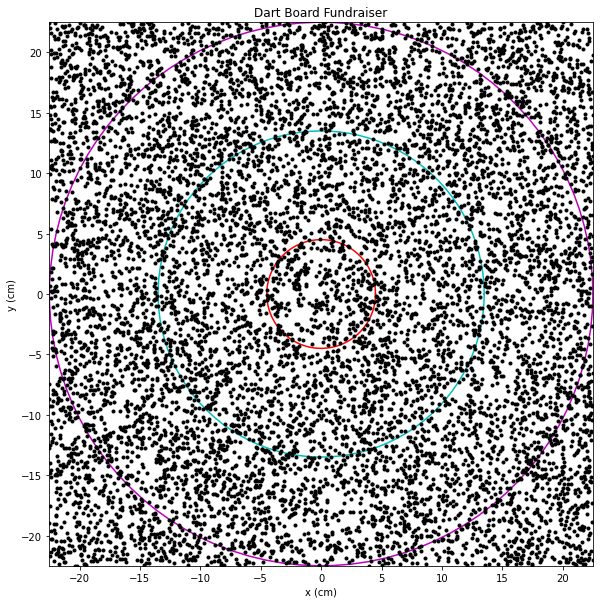

In [6]:
L = 45
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Ppurple = 1
Pblue = 5
Pred = 10
P = 2.07
Ntosses = 10000

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):
    
    x = rand.uniform(-L/2,L/2)
    y = rand.uniform(-L/2,L/2)
    xmodel.append(x)
    ymodel.append(y)
    
    r = np.sqrt(x**2+y**2)
    if r<Rpurple and r>Rblue:
        Npurple = Npurple + 1
    elif r<Rblue and r>Rred:
        Nblue = Nblue + 1
    elif r<Rred:
        Nred = Nred + 1

gross = P*Ntosses
loss = Ppurple*Npurple + Pblue*Nblue + Pred*Nred

        
print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Exercise 1: Extending your Game

1. What analytical questions can you ask about this fundraiser and how would you go about answering them?

2. How can you change your game?

## Gaussian Distribution

In the previous model of the dart board fundraiser, we assumed that every location on the board had an equal probability of a dart landing. Thus, we are assuming a person is blindfolded or is not trying to hit the bullseye. It's as if the dartboard is blank and they think the bullseye could be anywhere on the blank page. In reality, maybe more darts land near the blue circle than the red or purple circle. How can we modify our model to take this into account?

A normal distribution is one where the number of occurrences of a particular event in each bin follows a function

$$\frac{1}{\sqrt{2\pi \sigma}}e^{-(x-\mu)^2/(2\sigma)}$$

where $\mu$ is called the *mean* and $\sigma$ is the standard deviation.

The `random` package can return a random number that is generated from a normal distribution. Use the function

```
random.gauss(mu, sigma)
```

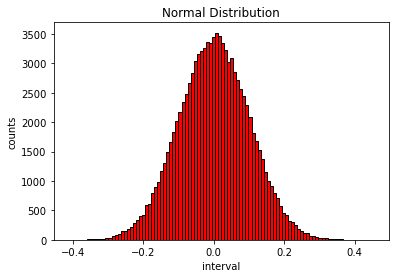

In [79]:
N=100000 #number of random numbers

mu=0 #mean
sigma=0.1 #standard deviation

r_numbers=[] #list to store random numbers

i=0
while i<N:
    r=rand.gauss(mu,sigma)
    r_numbers.append(r)
    i = i +1
    
totalbins = 100 # number of bins used for counting random numbers in that bin

histogram = plt.hist(r_numbers, bins=totalbins, facecolor='red', edgecolor='black', linewidth=1)
plt.title("Normal Distribution")
plt.xlabel("interval")
plt.ylabel("counts")
plt.show()

## Exercise 2: Using a Gaussian Distribution for the Fundraiser Dart Board

Where do you think most darts land on a dart board if people are aiming for the bullseye and if people are inexperienced at throwing darts?

How can we change our model to reflect that the mean x position at which darts land on the board is not zero (which is the bullseye)?

Percent in red = 1.25%
Percent in blue = 48.59%
Percent in purple = 48.92%
Percent not in a circle = 1.23%
Gross = $207000.00
Loss = $304402.00
Profit = $-97402.00 = -47.05% of gross


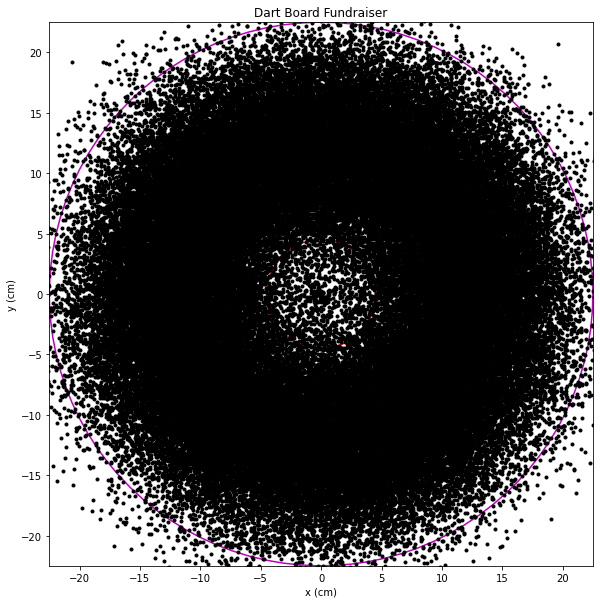

In [6]:
L = 45
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Mpurple = 1
Mblue = 5
Mred = 10
P = 2.07
Ntosses = 100000

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):
    
#     x = rand.uniform(-L/2,L/2)
#     y = rand.uniform(-L/2,L/2)
    theta = rand.uniform(0,2*np.pi)
    r = rand.gauss(Rblue, 4)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    xmodel.append(x)
    ymodel.append(y)
    
#    r = np.sqrt(x**2+y**2)
    if r<Rpurple and r>Rblue:
        Npurple = Npurple + 1
    elif r<Rblue and r>Rred:
        Nblue = Nblue + 1
    elif r<Rred:
        Nred = Nred + 1

gross = P*Ntosses
loss = Mpurple*Npurple + Mblue*Nblue + Mred*Nred

        
print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()